In [1]:
%load_ext autoreload
%autoreload 2
from CNN import AudioClassifier
import os
import torch
import numpy as np
from torch.utils.data import DataLoader
from custom_dataset import SpectrogramDataset, create_sampler
from training_pipeline import repeat_training, set_seed, worker_init_fn, plot_results
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Fixed values

In [2]:
SEED = 42
set_seed(SEED)
repetitions = 4
lr = 0.001
epochs = 100
tolerance = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Loading data

In [3]:
data_path = "data/train/audio_transformed"
train_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.TRAIN, augmentation=True)
val_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.VAL)
test_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.TEST)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 1024
n_workers = 4
prefetch_factor = 2 if n_workers > 0 else None
persistent_workers = True if n_workers > 0 else False

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor, persistent_workers=persistent_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor, persistent_workers=persistent_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor, persistent_workers=persistent_workers)

In [4]:
# oversampling
# alpha = 1
# sampler = create_sampler(train_dataset, alpha)
# train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

## Oversampling

In [5]:
def init_cnn_oversampling():
     return AudioClassifier(num_classes=11, drop=0.3)

set_seed(SEED)

alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for alpha in alphas:
    model_dir = f"output/models/all_classes/cnn/oversampling/oversampling={alpha}"
    history_dir = f"output/history/all_classes/cnn/oversampling/oversampling={alpha}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"

    sampler = create_sampler(train_dataset, alpha)
    train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

    repeat_training(repetitions, init_cnn_oversampling, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance)

training iteration: 1 of 4
starting training...
epoch: 1, training loss: 0.001545875912227117, training accuracy: 62.62135922330097, training balanced accuracy: 9.090610100812004
epoch: 1, validation loss: 0.001552246236983521, validation accuracy: 62.09179170344219, validation balanced accuracy: 9.090909090909092
model saved

epoch: 2, training loss: 0.0014385314354357435, training accuracy: 63.79384591293454, training balanced accuracy: 9.090909090909092
epoch: 2, validation loss: 0.0014728435911687552, validation accuracy: 62.09179170344219, validation balanced accuracy: 9.090909090909092
model saved

epoch: 3, training loss: 0.0013804592395179741, training accuracy: 63.519808957093645, training balanced accuracy: 10.186222688916708
epoch: 3, validation loss: 0.0013164868159096323, validation accuracy: 63.10679611650485, validation balanced accuracy: 12.735991634602028
model saved

epoch: 4, training loss: 0.0013046732240622222, training accuracy: 63.977842154713436, training balanc

In [6]:
# extension
set_seed(SEED)

alphas = [0.8]
for alpha in alphas:
    model_dir = f"output/models/all_classes/cnn/oversampling/oversampling={alpha}"
    history_dir = f"output/history/all_classes/cnn/oversampling/oversampling={alpha}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"

    sampler = create_sampler(train_dataset, alpha)
    train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

    repeat_training(repetitions, init_cnn_oversampling, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance)

training iteration: 1 of 4
starting training...
epoch: 1, training loss: 0.0022338931458966323, training accuracy: 17.060757907923584, training balanced accuracy: 13.73280192033646
epoch: 1, validation loss: 0.0020688944930502794, validation accuracy: 19.358634892615473, validation balanced accuracy: 24.40312222126476
model saved

epoch: 2, training loss: 0.001965614142479136, training accuracy: 25.432586908863136, training balanced accuracy: 24.342418154476633
epoch: 2, validation loss: 0.0019233308668941847, validation accuracy: 21.138570167696383, validation balanced accuracy: 35.09919719148918
model saved

epoch: 3, training loss: 0.0017724991932095984, training accuracy: 32.94119949890385, training balanced accuracy: 32.64103948426541
epoch: 3, validation loss: 0.0017073708058946728, validation accuracy: 30.817887614004118, validation balanced accuracy: 41.9280041242671
model saved

epoch: 4, training loss: 0.0016707426611995608, training accuracy: 37.02630754776072, training bala

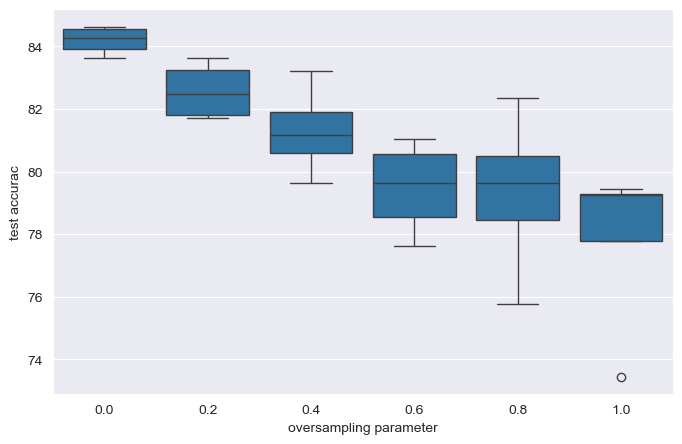

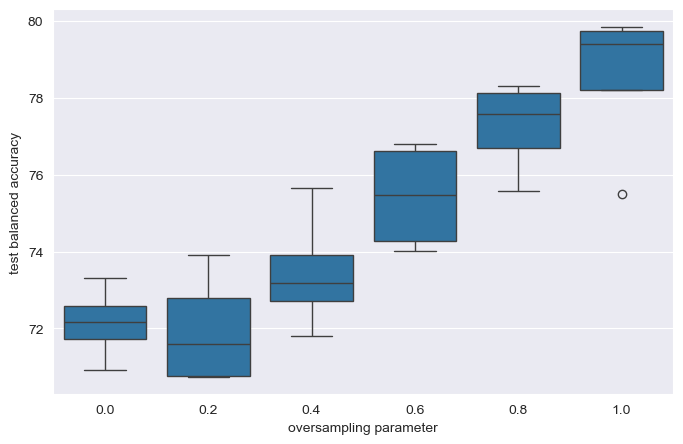

In [2]:
oversampling_root_dir = "output/history/all_classes/cnn/oversampling"
alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
x_label = "oversampling parameter"
plot_results(oversampling_root_dir, alphas, x_label, use_balanced_accuracy=False) # not considered case
plot_results(oversampling_root_dir, alphas, x_label, use_balanced_accuracy=True)

## Dropout

In [4]:
def init_cnn_dropout(dropout):
     return AudioClassifier(num_classes=11, drop=dropout)

set_seed(SEED)

optimal_alpha = 1 # select from above
sampler = create_sampler(train_dataset, optimal_alpha)
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

dropouts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
for dropout in dropouts:
    model_dir = f"output/models/all_classes/cnn/dropout/dropout={dropout}"
    history_dir = f"output/history/all_classes/cnn/dropout/dropout={dropout}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"
    
    repeat_training(repetitions, init_cnn_dropout, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance, dropout=dropout)

training iteration: 1 of 4
starting training...
epoch: 1, training loss: 0.002173356686196953, training accuracy: 18.779361102411524, training balanced accuracy: 18.809525828367676
epoch: 1, validation loss: 0.002430625016565146, validation accuracy: 12.724330685495733, validation balanced accuracy: 30.10328911570414
model saved

epoch: 2, training loss: 0.0018097852142933129, training accuracy: 32.37159411212026, training balanced accuracy: 32.14622476291721
epoch: 2, validation loss: 0.0019801922425272604, validation accuracy: 23.506913798175933, validation balanced accuracy: 42.942824162231794
model saved

epoch: 3, training loss: 0.0016383148013444072, training accuracy: 39.04635139367366, training balanced accuracy: 38.89328646220573
epoch: 3, validation loss: 0.0018767447252770178, validation accuracy: 26.33127390408944, validation balanced accuracy: 46.525913779927976
model saved

epoch: 4, training loss: 0.0015268377910726614, training accuracy: 43.76957406827435, training bala

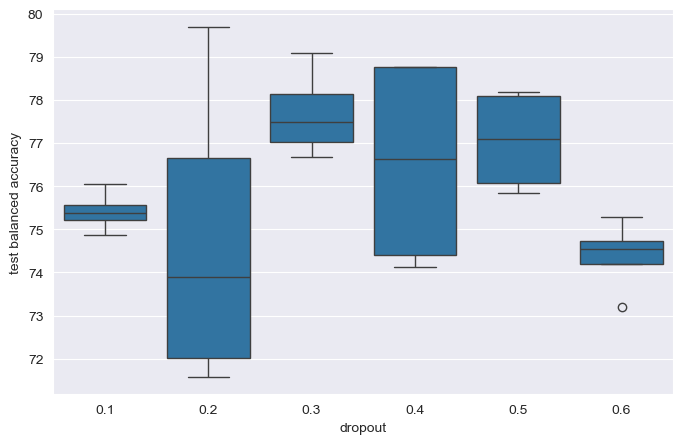

In [6]:
dropout_root_dir = "output/history/all_classes/cnn/dropout"
dropouts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
x_label = "dropout"
# plot_results(dropout_root_dir, dropouts, x_label, use_balanced_accuracy=False) # not considered case
plot_results(dropout_root_dir, dropouts, x_label, use_balanced_accuracy=True)


## Weight decay

In [7]:
optimal_dropout = 0.3
def init_cnn_weight_decay():
     return AudioClassifier(num_classes=11, drop=optimal_dropout)

set_seed(SEED)

optimal_alpha = 1
sampler = create_sampler(train_dataset, optimal_alpha)
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

weight_decays = [0.0, 0.00001, 0.0001, 0.001]
for weight_decay in weight_decays:
    model_dir = f"output/models/all_classes/cnn/weight_decay/weight_decay={weight_decay}"
    history_dir = f"output/history/all_classes/cnn/weight_decay/weight_decay={weight_decay}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"
    
    repeat_training(repetitions, init_cnn_weight_decay, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance, weight_decay=weight_decay)

training iteration: 1 of 4
starting training...
epoch: 1, training loss: 0.0022207171639565797, training accuracy: 16.769104290635767, training balanced accuracy: 16.79048551991364
epoch: 1, validation loss: 0.00242792839301127, validation accuracy: 11.106207708149455, validation balanced accuracy: 26.624853958159605
model saved

epoch: 2, training loss: 0.0019151348208806152, training accuracy: 27.35084559974945, training balanced accuracy: 27.14135756795118
epoch: 2, validation loss: 0.0020973188942339394, validation accuracy: 17.210944395410415, validation balanced accuracy: 39.43176565407986
model saved

epoch: 3, training loss: 0.0017311868205027187, training accuracy: 34.72831193235202, training balanced accuracy: 34.55581548963745
epoch: 3, validation loss: 0.0018868401984180833, validation accuracy: 23.948220064724918, validation balanced accuracy: 44.30369113532269
model saved

epoch: 4, training loss: 0.0016380355830779465, training accuracy: 38.61180707798309, training balan

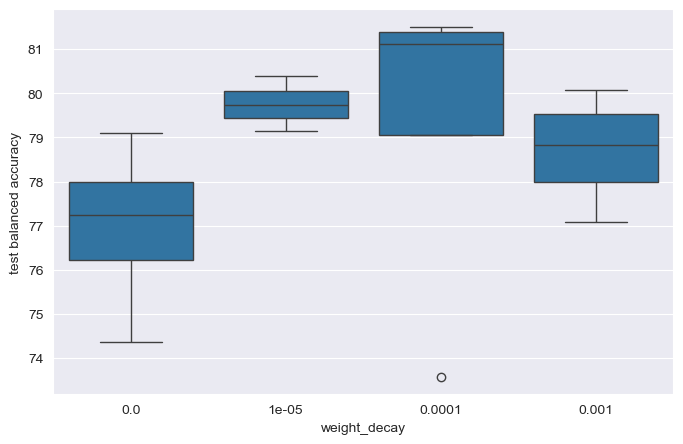

In [4]:
weight_decay_root_dir = "output/history/all_classes/cnn/weight_decay"
weight_decays = [0.0, 0.00001, 0.0001, 0.001]
x_label = "weight_decay"
plot_results(weight_decay_root_dir, weight_decays, x_label, use_balanced_accuracy=True)

## Augmented fraction

In [ ]:
optimal_alpha = 1
optimal_dropout = 0.3
optimal_weight_decay = 0.0001

def init_cnn_augmented_fraction():
     return AudioClassifier(num_classes=11, drop=optimal_dropout)

set_seed(SEED)

augmented_fractions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for augmented_fraction in augmented_fractions:
    model_dir = f"output/models/all_classes/cnn/augmented_fraction/augmented_fraction={augmented_fraction}"
    history_dir = f"output/history/all_classes/cnn/augmented_fraction/augmented_fraction={augmented_fraction}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"
    
    train_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.TRAIN, augmentation=True, augmented_fraction=augmented_fraction)
    sampler = create_sampler(train_dataset, optimal_alpha)
    train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)
    
    repeat_training(repetitions, init_cnn_augmented_fraction, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance, weight_decay=optimal_weight_decay)

In [ ]:
augmented_fraction_root_dir = "output/history/all_classes/cnn/augmented_fraction"
augmented_fractions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
x_label = "augmented_fraction"
plot_results(augmented_fraction_root_dir, augmented_fractions, x_label, use_balanced_accuracy=True)

## Label smoothing

In [ ]:
optimal_alpha = 1
optimal_dropout = 0.3
optimal_weight_decay = 0.0001
optimal_augmented_fraction = None

def init_cnn_label_smoothing():
     return AudioClassifier(num_classes=11, drop=optimal_dropout)

set_seed(SEED)

train_dataset = SpectrogramDataset(data_path, set_type=SpectrogramDataset.TRAIN, augmentation=True, augmented_fraction=optimal_augmented_fraction)
sampler = create_sampler(train_dataset, optimal_alpha)
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=batch_size, shuffle=False, num_workers=n_workers, pin_memory=True, prefetch_factor=prefetch_factor,persistent_workers=persistent_workers, worker_init_fn=worker_init_fn)

label_smoothing_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

for label_smoothing in label_smoothing_list:
    model_dir = f"output/models/all_classes/cnn/label_smoothing/label_smoothing={label_smoothing}"
    history_dir = f"output/history/all_classes/cnn/label_smoothing/label_smoothing={label_smoothing}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(history_dir, exist_ok=True)
    
    model_path = model_dir + "/cnn.pth"
    history_path = history_dir + "/cnn.pkl"
    
    repeat_training(repetitions, init_cnn_label_smoothing, lr, model_path, history_path, epochs, train_loader, val_loader, test_loader, device, tolerance=tolerance, weight_decay=optimal_weight_decay)

In [ ]:
label_smoothing_root_dir = "output/history/all_classes/cnn/label_smoothing"
label_smoothing_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
x_label = "label_smoothing"
plot_results(label_smoothing_root_dir, label_smoothing_list, x_label, use_balanced_accuracy=True)